# School of Hard Knocks

This notebook is a dive into Machine Learning and Data Science by using a fake school of test data. By carefully and deliberately generating a fake school's test results, we can insert patterns, irregularities and trends and test our analysis to make sure we pick it up.


In [40]:
# Required libraries and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [117]:
from random import shuffle

class Generator:
    """
    Handles the generation of students results for analysis.
    """
    
    def __init__(self, limit):

        self.students = self._get_students()
            
        self.limit = limit
    
    def _get_scores(self):
        """ Return a list of appropriately generated scores. """
        def trunc(value):
            if value < 0:
                return 0
            elif value > 100:
                return 100
            else:
                return value
        return [trunc(100 * random.normalvariate(0.6, 0.2))
                for x in range(0, 100)]
        
    def _get_students(self):
        """Create the initail student list"""
        with open("names_male.txt", 'r') as f:
            males = [name.split(' ')[0] for name in f.readlines()] 
        with open("names_female.txt", 'r') as f:
            females = [name.split(' ')[0] for name in f.readlines()]
        
        scores = self._get_scores()

        students = [{'Name': name,
                    'Gender': 'Male',
                    'Score': scores[k]} for k, name in enumerate(males)]

        students += [{'Name': female,
                     'Gender': 'Female',
                     'Score': scores[k]} for k, female in enumerate(females)]
        
        shuffle(students)
        return students
        
    def get_names(self):
        return pd.Series([stu['Name'] for stu in self.students[0: self.limit]])
    
    def get_scores(self):
        return pd.Series([stu['Score'] for stu in self.students[0: self.limit]])

    def get_genders(self):
        return pd.Series([stu['Gender'] for stu in self.students[0: self.limit]])
    
gen = Generator(100)
results = pd.DataFrame({"Name": gen.get_names(),
                        "Score": gen.get_scores(),
                        "Gender": gen.get_genders()})
results[:10]


,Gender,Name,Score
0,Female,Ashlee,40.867486
1,Female,Ernestina,58.248426
2,Female,Pansy,63.673367
3,Female,Starr,54.466595
4,Male,Gregorio,100.000000
5,Female,Louise,65.451580
6,Female,Meryl,98.417196
7,Male,Shannon,24.757626
8,Male,Dwayne,1.146803
9,Male,Clement,72.505586


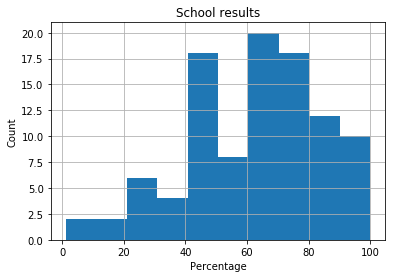

In [119]:
fig, ax = plt.subplots()
ax.hist(results['Score'])
plt.title("School results")
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.grid(True)


In [89]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']

In [90]:
cities['City name'].apply(lambda c: c.startswith('San')) & cities['Area square miles'].apply(lambda c: c > 50)

0    False
1     True
2    False
dtype: bool

In [57]:
cities.reindex(np.random.permutation(cities.index))
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
2,San Jose,1015785,176.53,5754.177760
1,Sacramento,485199,97.92,4955.055147
